In [1]:
import pandas as pd
import numpy as np
%pylab notebook
import seaborn
import humanhash

Populating the interactive namespace from numpy and matplotlib


# Tablas Pivote

Es muy común la agrupación de información en formato 'stack' donde tenemos filas de datos que demuestran una correlación entre dos sets de valores.

Las tablas pivote son una forma de re-ordenar los datos en una estructura tabular donde podemos agrupar los valores convirtiendo las tuplas entre valores numéricos.

En este caso de ejemplo, crearemos un dataset de prueba con la diversidad de restaurantes en varias ciudades centroamericanas. En esta vamos a comenzar a trabajar con dos columnas, una donde describe cada ciudad y la otra con la variedad de cocina disponible en cada una.

In [2]:
data_restaurantes = {
    'ciudades': ['Guatemala','Guatemala','Guatemala','Guatemala','Guatemala','Guatemala','San José','San José','San José','San José','San José','San Salvador','San Salvador','San Salvador'],
    'culinaria': ['Chapina','Chapina','China','Thai','Italiana','Chapina','Italiana','China','Tica','Chapina','Tica','Tica','Italiana','China']
}

restaurantes_dataframe_pares = pd.DataFrame(data_restaurantes)
restaurantes_dataframe_pares

,ciudades,culinaria
0,Guatemala,Chapina
1,Guatemala,Chapina
2,Guatemala,China
3,Guatemala,Thai
4,Guatemala,Italiana
5,Guatemala,Chapina
6,San José,Italiana
7,San José,China
8,San José,Tica
9,San José,Chapina


Podemos ver entonces este listado de valores, tupla por tupla. Que tal si queremos contar la presencia de cada tipo de cocina en cada región. Probemos utilizando entonces el comando [DataFrame.pivot_table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html) de Pandas.

Este pide unos cuantos argumentos los que podemos ver en la documentación. Unos cuantos son obvios, como el definir las filas y columnas que esperamos de la tabla objetivo.
Sin embargo, lo más notable es que ya que los tipos de datos que estamos utilizando no son numéricos, es necesario que definamos una funcion de agrupación que nos permita contar la cantidad de instancias de cada combinación.

In [3]:
def funcion_agrupacion(elemento):
    return True

agrupacion_culinaria = restaurantes_dataframe_pares.pivot_table(
    index=["ciudades"],
    columns="culinaria",
    aggfunc=funcion_agrupacion,
    fill_value=False)
agrupacion_culinaria

culinaria,Chapina,China,Italiana,Thai,Tica
ciudades,,,,,
Guatemala,True,True,True,True,False
San José,True,True,True,False,True
San Salvador,False,True,True,False,True


Hmm, esto ya se ve con la forma que queremos, sin embargo solo nos muestra la presencia o ausencia de algún tipo de cocina. Esto es fácil de explicar ya que definimos nuestra función de agrupación como retornar True si existe presencia a retornar False si No. ¿Qué tal si hacemos una mejor función de agrupación?

In [4]:
def funcion_agrupacion(elemento):
    '''Contemos cuantas instancias de cada tupla existen.'''
    ## El comando len(iterable) cuenta la cantidad de elementos que tiene el objeto iterable que le pasemos
    ## los elementos iterables pueden ser listas normales, Series de NumPy o Pandas, o diccionarios y otros tipos de datos.
    return len(elemento)
agrupacion_culinaria = restaurantes_dataframe_pares.pivot_table(index=["ciudades"], columns="culinaria", aggfunc=lambda x: funcion_agrupacion(x), fill_value=0)
agrupacion_culinaria

culinaria,Chapina,China,Italiana,Thai,Tica
ciudades,,,,,
Guatemala,3,1,1,1,0
San José,1,1,1,0,2
San Salvador,0,1,1,0,1


¡Genial! Ahora ya tenemos agrupadas estas de una forma coherente. Ahora ya podemos seguir manipulando y editando estos datos.
Pero, ¿qué tal si hacemos un poco más simple esta llamada? Al final nuestra función de agrupación lo unico que hace es contar la cantidad de tuplas sobre las cuales aplica el pivote. ¿Qué tal si lo hacemos un poco más simple?

In [5]:
agrupacion_culinaria = restaurantes_dataframe_pares.pivot_table(
    index=["ciudades"], 
    columns="culinaria", 
    aggfunc=len, ## Enviamos directamente la función de agrupación. Entre otras funcionas de agrupacíon útiles está np.sum (la función de suma de NumPy) y np.mean (media)
    fill_value=0)
agrupacion_culinaria

culinaria,Chapina,China,Italiana,Thai,Tica
ciudades,,,,,
Guatemala,3,1,1,1,0
San José,1,1,1,0,2
San Salvador,0,1,1,0,1


Claro, la tabla resultante se comporta exactamente igual y tiene todas las propiedades nativas de los DataFrames. ¿Qué tal si limitamos la query a solo los lugares en ciudad de Guatemala?

In [6]:
agrupacion_culinaria.query('ciudades == ["Guatemala"]')

culinaria,Chapina,China,Italiana,Thai,Tica
ciudades,,,,,
Guatemala,3,1,1,1,0


In [7]:
## Con el argumento Margins, Panda calcula los valores sumados de los totales por agrupación.
agrupacion_culinaria_m = restaurantes_dataframe_pares.pivot_table(
    index=["ciudades"],
    columns="culinaria",
    aggfunc=len,
    fill_value=0,
    margins=True)
agrupacion_culinaria_m

culinaria,Chapina,China,Italiana,Thai,Tica,All
ciudades,,,,,,
Guatemala,3.0,1.0,1.0,1.0,0.0,6.0
San José,1.0,1.0,1.0,0.0,2.0,5.0
San Salvador,0.0,1.0,1.0,0.0,1.0,3.0
All,4.0,3.0,3.0,1.0,3.0,14.0


## Múltiples Valores y Múltiples Indices
¿Qué tal si tenemos datos que tienen una estructura Jerárquica inherente? Podemos utilizar la misma forma de multi indexación que vimos en el seminario pasado, lo importante es que a la hora de la definición del índice, Pandas es capaz de manipularlos e inteligentemente ordenar los niveles acorde.

In [8]:
restaurantes_dataframe_pares['estrellas'] = [5,3,3,5,3,1,2,2,4,3,4,3,2,3]
restaurantes_dataframe_estrellas = restaurantes_dataframe_pares
restaurantes_dataframe_estrellas

,ciudades,culinaria,estrellas
0,Guatemala,Chapina,5
1,Guatemala,Chapina,3
2,Guatemala,China,3
3,Guatemala,Thai,5
4,Guatemala,Italiana,3
5,Guatemala,Chapina,1
6,San José,Italiana,2
7,San José,China,2
8,San José,Tica,4
9,San José,Chapina,3


Pivotando sobre la especialidad culinaria y estrellas, podemos las ciudades con la mayor oferta culinaria, o cuales tienen el mejor promedio de estrellas.

In [9]:
agrupacion_culinaria_promedio_estrellas = restaurantes_dataframe_estrellas.pivot_table(
    index=["ciudades"], 
    values=["culinaria", "estrellas"], 
    aggfunc={"culinaria":len,"estrellas":np.mean},
    fill_value=0)
agrupacion_culinaria_promedio_estrellas

,culinaria,estrellas
ciudades,,
Guatemala,6,3.333333
San José,5,3.000000
San Salvador,3,2.666667


¿Qué tal si queremos ver cuantas estrellas en promedio tienen los restaurantes?

In [10]:
agrupacion_culinaria_por_estrellas = restaurantes_dataframe_estrellas.pivot_table(
    index=["ciudades"], 
    values=["estrellas"], 
    columns=["estrellas"],
    aggfunc={"estrellas":np.mean},
    fill_value=0)
agrupacion_culinaria_por_estrellas

estrellas            
estrellas            1  2  3  4  5
ciudades                          
Guatemala            1  0  3  0  5
San José             0  2  3  4  0
San Salvador         0  2  3  0  0

Hmm... esto no es muy útil, solo nos dice tautológicamente, que los restaurantes de 'n' estrellas tienen 'n' estrellas. ¿Pueden ver porque el error?

In [11]:
agrupacion_culinaria_por_estrellas = restaurantes_dataframe_estrellas.pivot_table(
    index=["ciudades"], 
    values=["estrellas"], 
    columns=["culinaria"], ## Aqui es obvio ver que lo que queremos es diferenciar por variedad culinaria.
    aggfunc={"estrellas":np.mean},
    fill_value=0,
    margins=True)
agrupacion_culinaria_por_estrellas

estrellas                                             
culinaria      Chapina     China  Italiana Thai      Tica       All
ciudades                                                           
Guatemala          3.0  3.000000  3.000000  5.0  0.000000  3.333333
San José           3.0  2.000000  2.000000  0.0  4.000000  3.000000
San Salvador       0.0  3.000000  2.000000  0.0  3.000000  2.666667
All                3.0  2.666667  2.333333  5.0  3.666667  3.071429

<IPython.core.display.Javascript object>


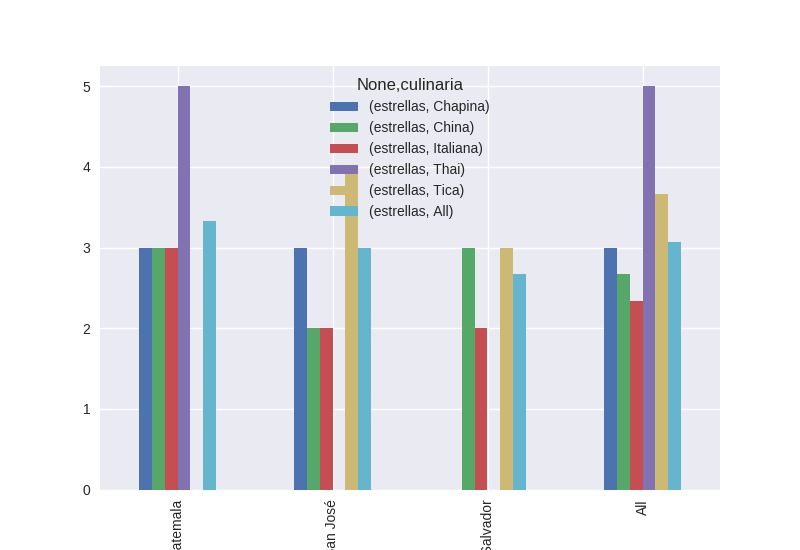

In [12]:
agrupacion_culinaria_por_estrellas.plot(kind="bar")

¿Qué tal si lo pivotamos por ciudad?

In [13]:
agrupacion_culinaria_por_estrellas = restaurantes_dataframe_estrellas.pivot_table(
    index=["ciudades"], 
    values=["estrellas"], 
    columns=["culinaria"], ## Aqui es obvio ver que lo que queremos es diferenciar por variedad culinaria.
    aggfunc={"estrellas":np.mean},
    fill_value=0)
agrupacion_culinaria_por_estrellas

estrellas                         
culinaria      Chapina China Italiana Thai Tica
ciudades                                       
Guatemala            3     3        3    5    0
San José             3     2        2    0    4
San Salvador         0     3        2    0    3

<IPython.core.display.Javascript object>


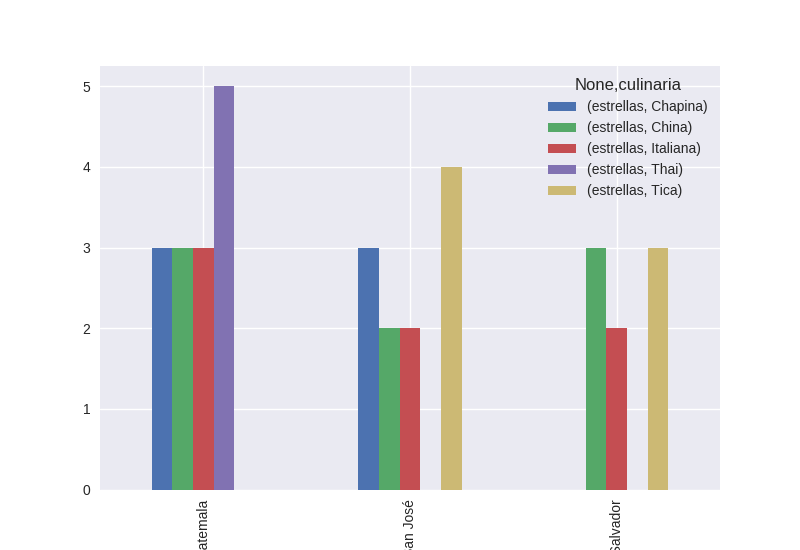

In [14]:
agrupacion_culinaria_por_estrellas.plot(kind="bar")